In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [144]:
def resumetable(df):
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name", "dtypes"]]
    summary["Missing"] = df.isnull().sum().values
    summary["Miss_percent"] = round((summary["Missing"]*100)/df.shape[0],0)
    summary["Uniques"] = df.nunique().values
    summary["First value"] = df.iloc[0].values
    summary["Second value"] = df.iloc[1].values
    summary["Third value"] = df.iloc[2].values
    return summary

In [145]:
data = pd.read_csv(r'C:\Users\lramkalia\Documents\EICNAM\Entroposage\Entroposage\depart_employes.csv', sep=";")
display(data.head())

,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees,Service,niveau_salaire
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [146]:
resumetable(data).T

Format de la base : (14999, 10)


,0,1,2,3,4,5,6,7,8,9
Name,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees,Service,niveau_salaire
dtypes,float64,float64,int64,int64,int64,int64,int64,int64,object,object
Missing,0,0,0,0,0,0,0,0,0,0
Miss_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uniques,92,65,6,215,8,2,2,2,10,3
First value,0.38,0.53,2,157,3,0,1,0,sales,low
Second value,0.8,0.86,5,262,6,0,1,0,sales,medium
Third value,0.11,0.88,7,272,4,0,1,0,sales,medium


In [147]:
data["depart"]=data["depart"].astype(str)
data["Service"]=data["Service"].astype("category")
data["niveau_salaire"]=data["niveau_salaire"].astype("category")
data["promotion_5_dernieres_annees"]=data["promotion_5_dernieres_annees"].astype("category")
data["Accident_du travail"]=data["Accident_du travail"].astype("category")

In [148]:
resumetable(data).T

Format de la base : (14999, 10)


,0,1,2,3,4,5,6,7,8,9
Name,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise,Accident_du travail,depart,promotion_5_dernieres_annees,Service,niveau_salaire
dtypes,float64,float64,int64,int64,int64,category,object,category,category,category
Missing,0,0,0,0,0,0,0,0,0,0
Miss_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uniques,92,65,6,215,8,2,2,2,10,3
First value,0.38,0.53,2,157,3,0,1,0,sales,low
Second value,0.8,0.86,5,262,6,0,1,0,sales,medium
Third value,0.11,0.88,7,272,4,0,1,0,sales,medium


In [149]:
data.describe()

,Satisfaction,derniere_evaluation,Nombre_de_projets,Nombre_heures_mensuelles_moyenne,Temps_passe_dans_entreprise
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


### Etat des lieux

* Nous pouvons constater ici que :
    * Le nombre d'entrées est limité (14999 lignes)
    * Nous avons de la chance : il n'y a pas de valeurs manquantes (Nan)
    * Les variables sont des nombres décimaux, des entiers et des catégories
    * La description de data montre aussi qu'il n'y a à priori pas d'outliers

A priori il n'y a donc pas de modifications importantes à réaliser avant de commencer à travailler.

In [150]:
display(data['depart'].value_counts(normalize=True))
display(data['depart'].value_counts(normalize=False))

0    0.761917
1    0.238083
Name: depart, dtype: float64

0    11428
1     3571
Name: depart, dtype: int64

In [151]:
positive_data= data[data['depart']=="1"]
negative_data= data[data['depart']=="0"]

In [154]:
col_cat=[e for e in list(data.columns) if (data[e].dtype.name =="category" or data[e].dtype.name =="object")]
col_num=[e for e in list(data.columns) if data[e].dtype.name !="category"]

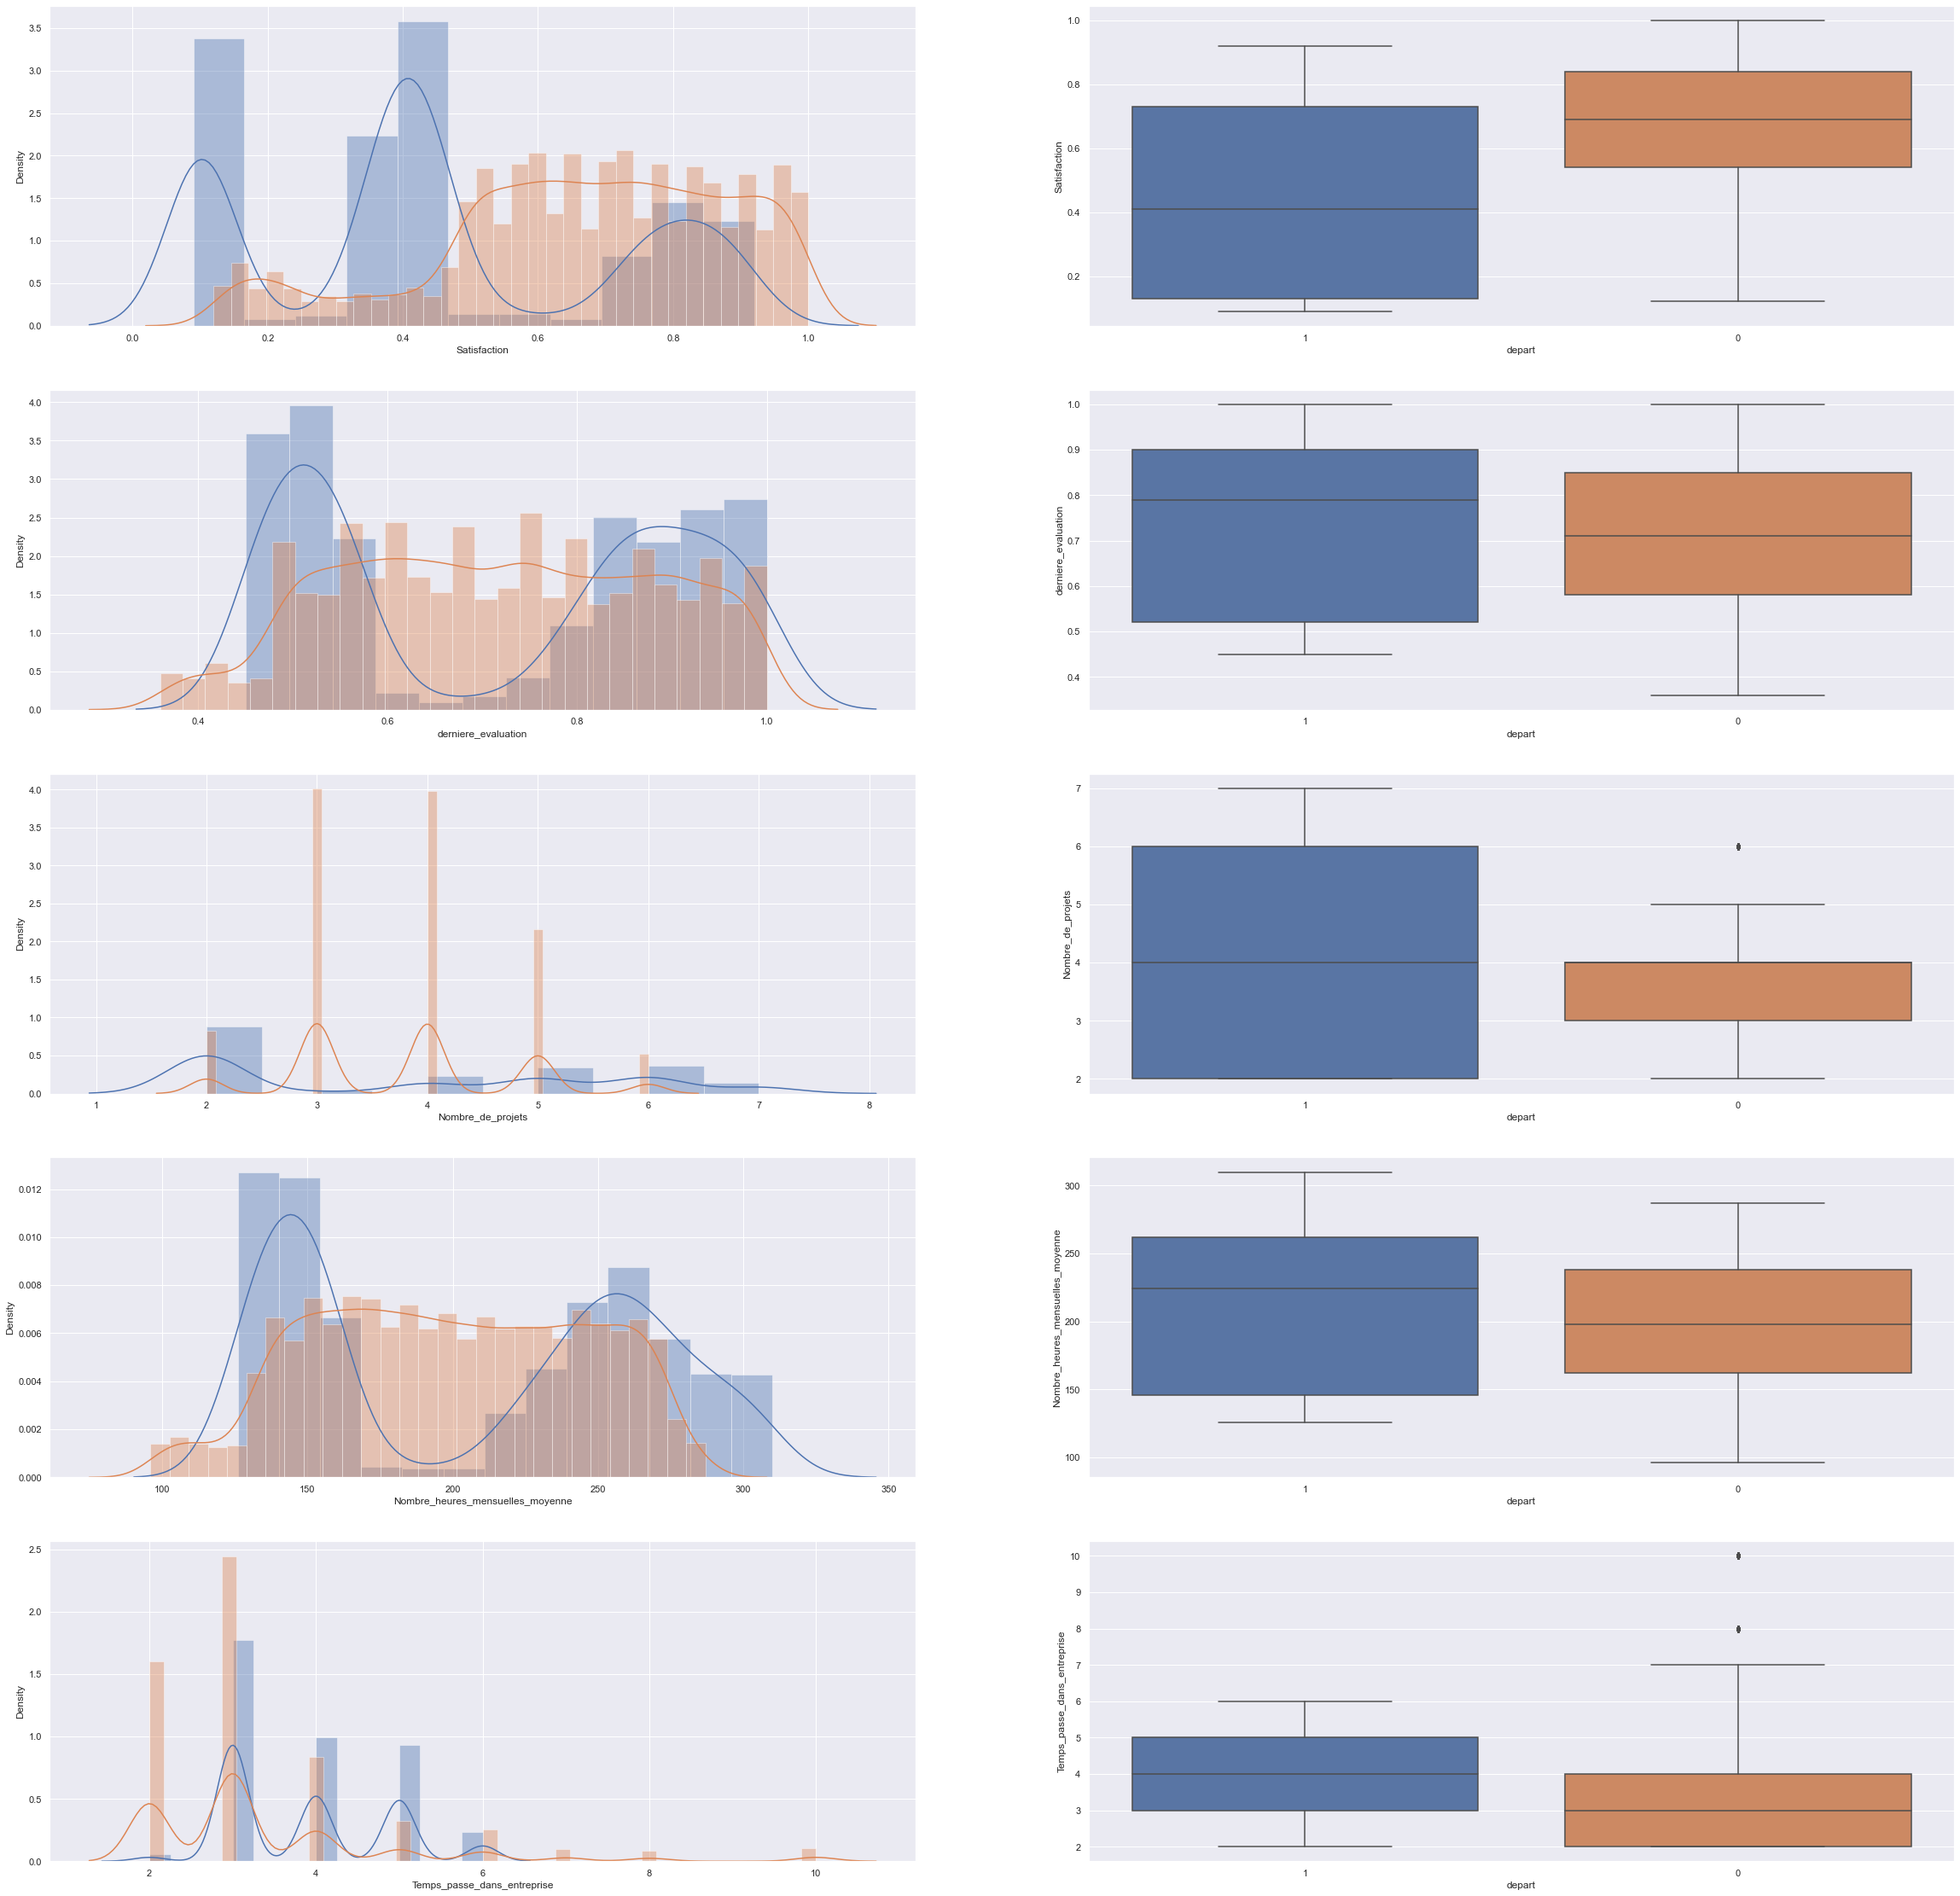

In [155]:
sns.set()
fig, axs =plt.subplots(len(col_num)-1,2,figsize=(40,40))

for i in range(len(col_num)-1):
  sns.distplot(positive_data[col_num[i]], label='positive',ax=axs[i,0])
  sns.distplot(negative_data[col_num[i]], label='negative',ax=axs[i,0])

  sns.boxplot(data=data,y=col_num[i], x='depart', ax=axs[i,1])
  

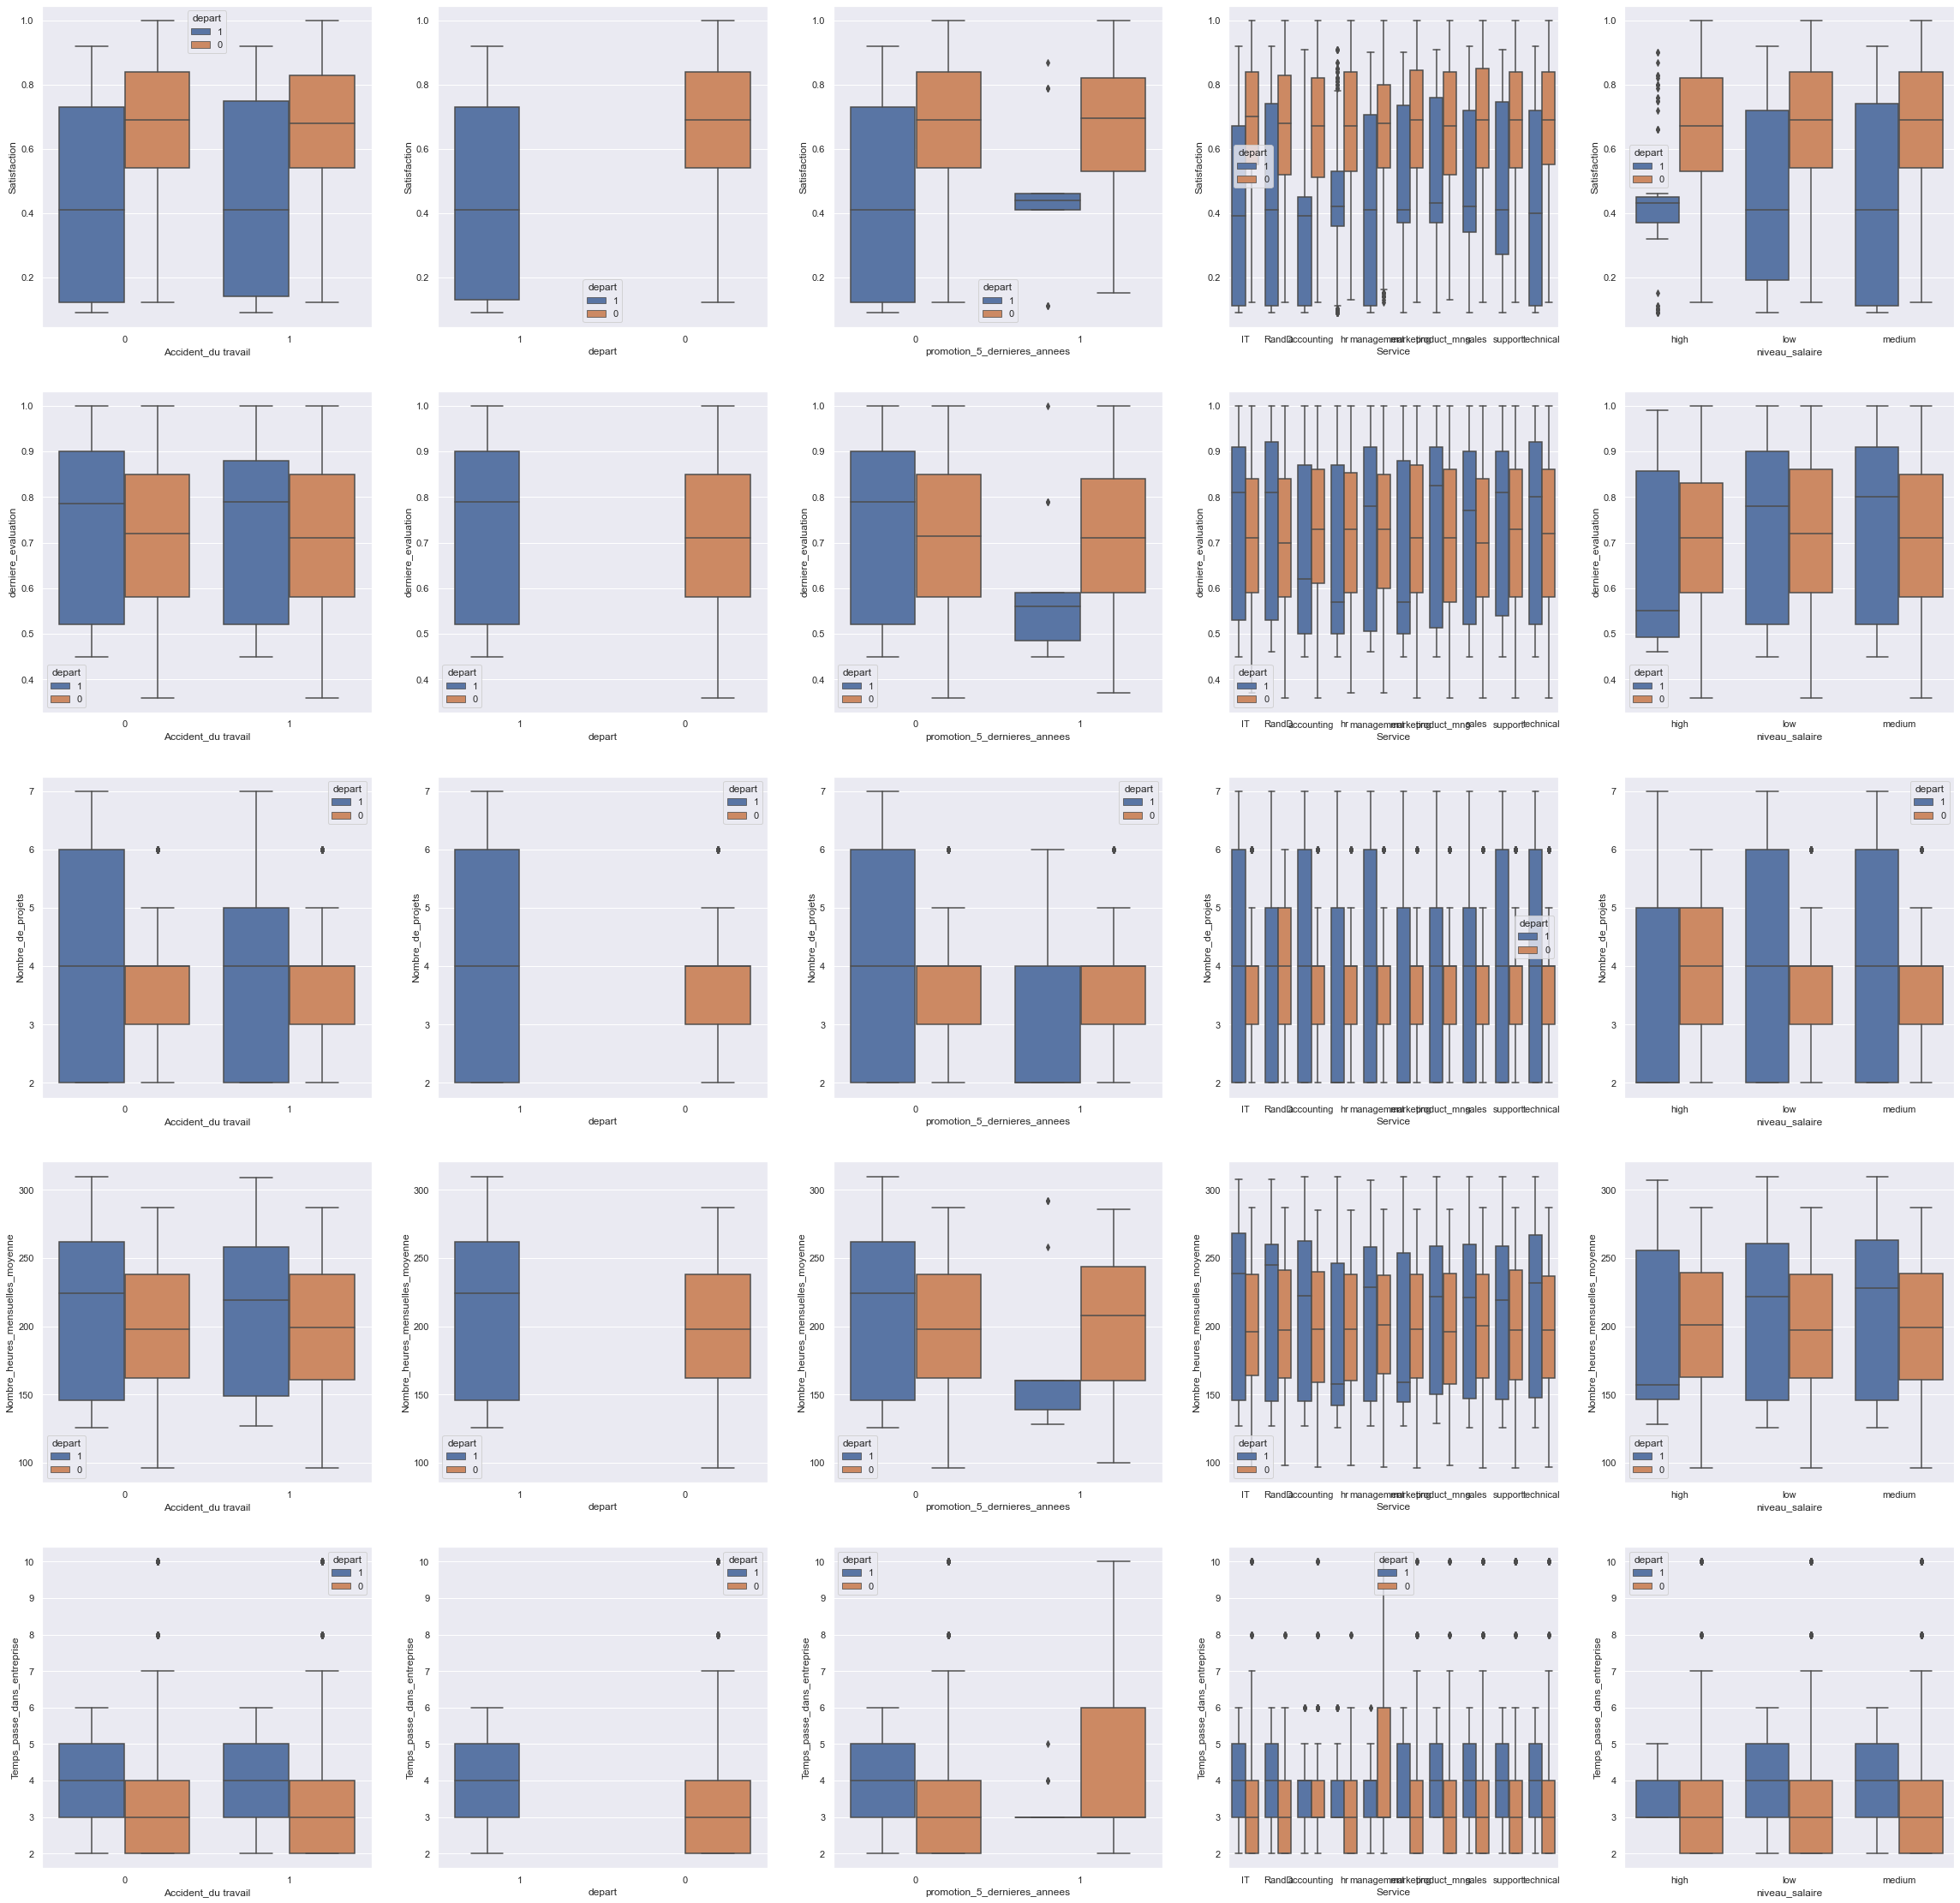

In [156]:
sns.set()
fig, axs =plt.subplots(len(col_num)-1,len(col_cat),figsize=(40,40))
for i in range(len(col_num)-1):
    for j in range(len(col_cat)):
        sns.boxplot(data=data,y=col_num[i], x=col_cat[j], hue='depart', ax=axs[i,j])

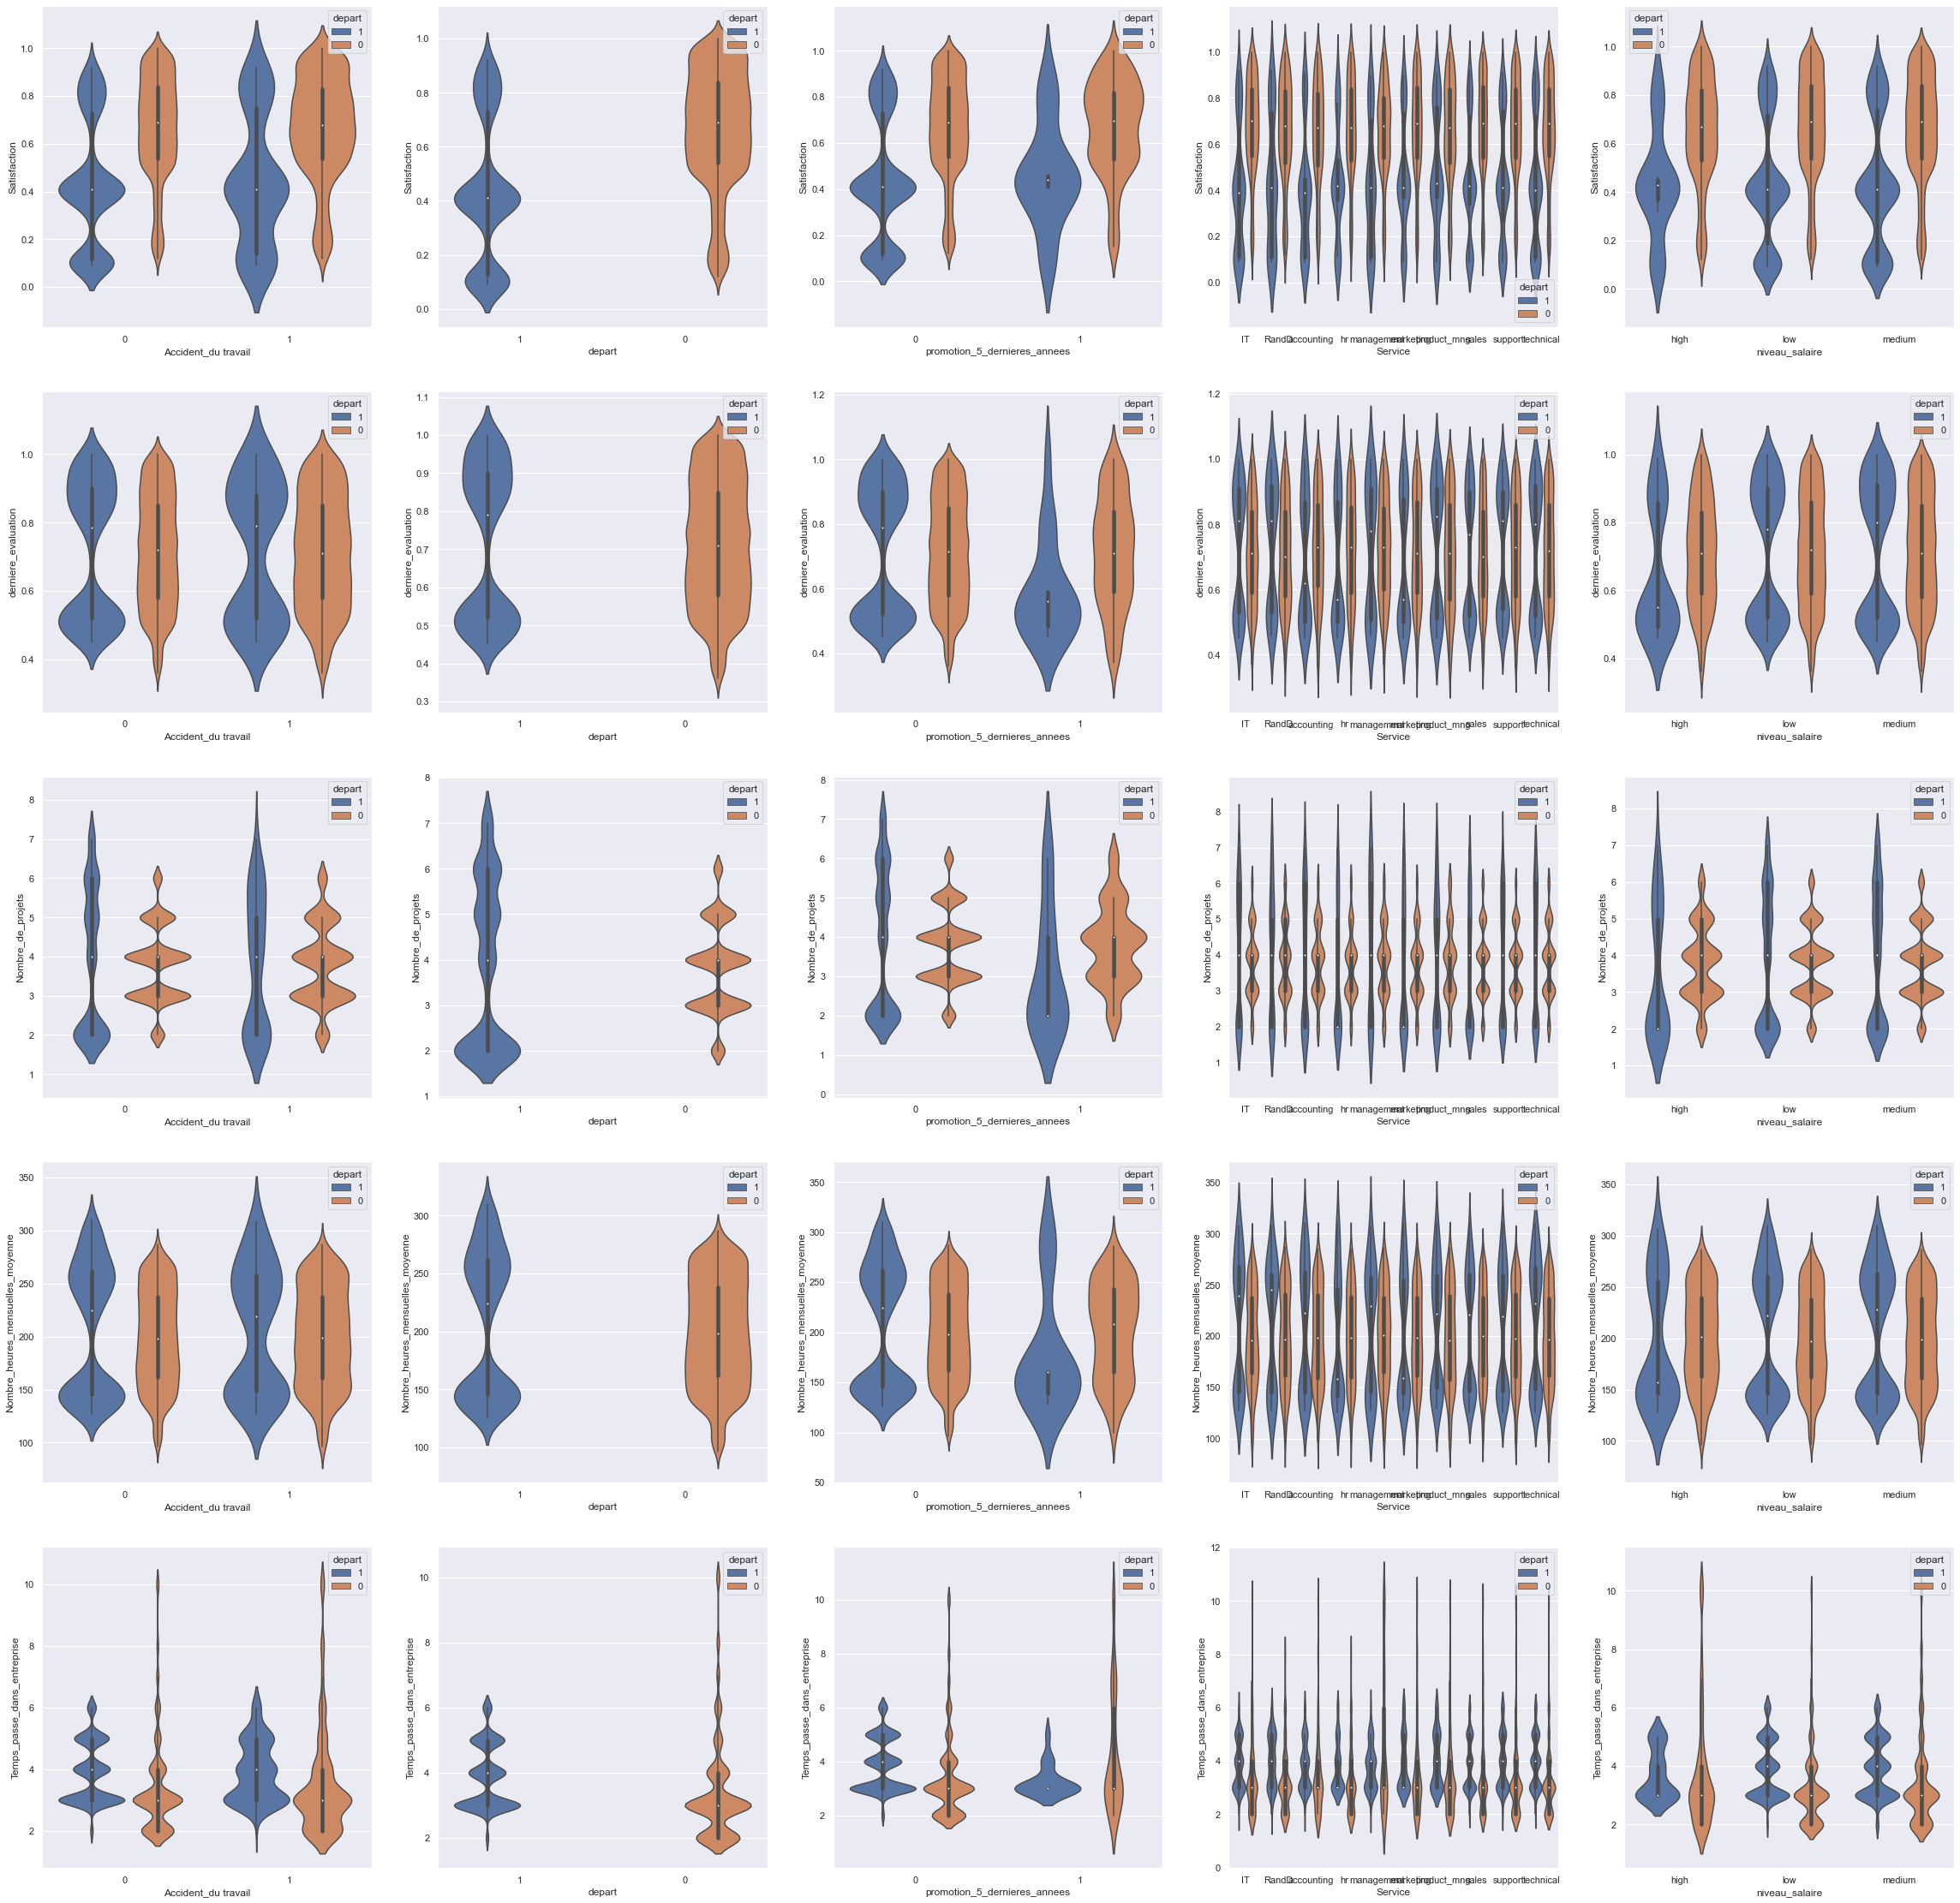

In [157]:
sns.set()
fig, axs =plt.subplots(len(col_num)-1,len(col_cat),figsize=(40,40))
for i in range(len(col_num)-1):
    for j in range(len(col_cat)):
        sns.violinplot(data=data,y=col_num[i], x=col_cat[j], hue='depart', ax=axs[i,j])

<Figure size 1440x1440 with 0 Axes>

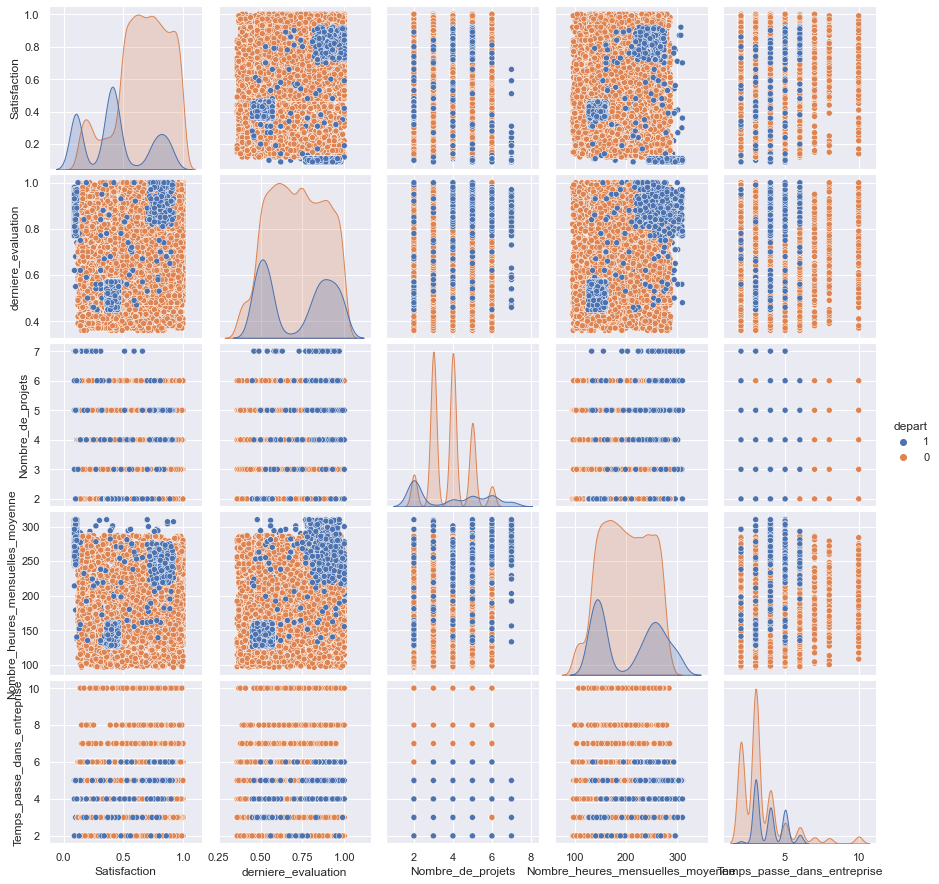

In [158]:
plt.figure(figsize=(20,20))
sns.pairplot(data[col_num],hue='depart', kind='scatter', diag_kind="kde");

In [170]:
for e in col_cat:
    print(e)
    print(data[e].unique())

Accident_du travail
[0, 1]
Categories (2, int64): [0, 1]
depart
['1' '0']
promotion_5_dernieres_annees
[0, 1]
Categories (2, int64): [0, 1]
Service
['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
Categories (10, object): ['IT', 'RandD', 'accounting', 'hr', ..., 'product_mng', 'sales', 'support', 'technical']
niveau_salaire
['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['OUI', 1], ['NON', 0]]
X1= [['OUI', "1"], ['NON', "0"]]
X2=['low', 'medium', 'high']
enc.fit(X)

In [167]:
data1=data.copy()
data1["depart"]=data1["depart"].astype(str)
data1["Service"]=data1["Service"].astype(str)
data1["niveau_salaire"]=data1["niveau_salaire"].astype(str)
data1["promotion_5_dernieres_annees"]=data1["promotion_5_dernieres_annees"].astype(str)
data1["Accident_du travail"]=data1["Accident_du travail"].astype(str)

<AxesSubplot:>

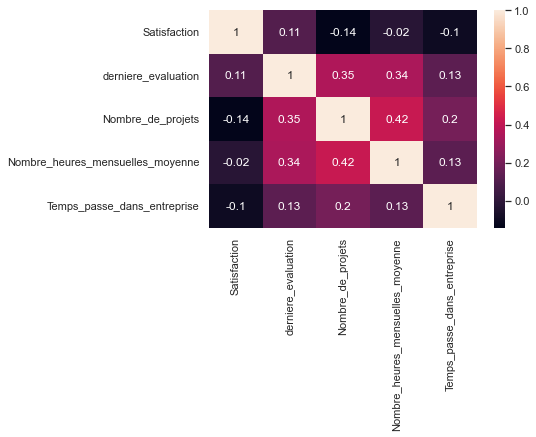

In [168]:
correlation=data1.corr()
sns.heatmap(correlation,annot=True)